# Nuclear Electronics Individual Analysis &ndash; Solutions

Use this template to carry out the analysis tasks for the Nuclear Electronics experiment.  You may need to consult the documentation for different Python packages.  Also recommended: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

## First, import some packages

This is a good idea at the beginning of your notebook to include the packages that you will need.  We will use the four shown below here.  A brief description:
* `numpy` is the foundational package for Python numerical work. It extends and speeds up array operations beyond standard Python, and it includes almost all math functions that you would need for example `sqrt()` (square root) or `cos()` (cosine).  These would be written in code as `np.sqrt()` or `np.cos()`.
* `scipy` is a huge collection of scientific data analysis functions, routines, physicical constants, etc.  This is the second most used package for scientific work.  In this notebook, we will only make use of one physical constant (the speed of light).  Documentation is at [SciPy.org](https://docs.scipy.org/doc/scipy/reference/) with the constants subpackage at https://docs.scipy.org/doc/scipy/reference/constants.html.
* `uncertainties` is a very useful small package that simplifies uncertainty propagation and printing out of quantities with uncertainty.  As part of this notebook, you will calculate an uncertainty the "hard way" by explicit calculation and by using the Uncertainties package. Documentation is at https://pythonhosted.org/uncertainties/
* `matplotlib` is *the* standard plotting package for scientific Python.  We will use a subset called `pyplot` which is modeled after the plotting functions used in MATLAB. The last line below, `%matplotlib inline`, simply forces the plots to appear within the notebook.    

In [1]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import matplotlib.pyplot as plt
%matplotlib inline

## Cable propagation speed

### Part 1: Just the value

From the video on Signal Speed & Cable Impedance, extract the reflection time and cable length for the long cable used.  Assign them to the variables below. Then calculate the propagation speed.  Be careful with units!  What is the speed in m/s?  What is it in units of the speed of light $c$?  The speed of light is given by `const.c`.  Check this with `print(const.c)`.

In [2]:
cable_length = 28.1 # meters
delta_t = 288.7e-9 # seconds

prop_speed = (2.0*cable_length)/delta_t
print('Propagation speed = {:.2f} m/s'.format(prop_speed))

speed_in_c = prop_speed/const.c
print('Propagation speed = {:.4f} c'.format(speed_in_c))


Propagation speed = 194665742.99 m/s
Propagation speed = 0.6493 c


### Part 2: Calculating uncertainty, the hard(er) way

Assume the uncertainty in the length is +/- the least digit and that the uncertainty in the reflection time is 2 percent.  Use the formula for the propagation speed to derive an error-propagation formula for the same, and caluclate the uncertainty in the speed $v$.  See [Notes on data analysis and experimental uncertainty](https://courses.washington.edu/phys431/uncertainty_notes.pdf) or [Quickie Statistics Summary](https://courses.washington.edu/phys431/331statistics05b.pdf) from the course website.  Put the uncertainty values into the `sigma_<variable>` forms below.

Then make sure to print out the values above with their uncertainty, in both m/s and units of c.

### *Solution discussion*

The formula is a product/quotient form $v = 2L/\Delta t$, so the fractional uncertainty of the speed $v$ is the sum of the squares of the fractional uncertainty in each quantity.

The display of the quantity with uncertainty is tricky.  the value of $v$ should be displayed to te same *precision* as the uncertainty, that is, the same number of digits past the decimal point, and the uncertainty itself should not use more than 2 significant digits.  So the solution is not completely correct in terms of display convention.

In [3]:
cable_length = 28.1 # meters
sigma_cable_length = 0.1 # meters
delta_t = 288.7e-9 # seconds
sigma_delta_t = 0.02*delta_t # seconds

prop_speed = (2.0*cable_length)/delta_t
sigma_prop_speed = prop_speed*np.sqrt((sigma_cable_length/cable_length)**2 + (sigma_delta_t/delta_t)**2)
print('Propagation speed = {:.4g} +/- {:.2g} m/s'.format(prop_speed, sigma_prop_speed))

speed_in_c = prop_speed/const.c
sigma_speed_in_c = sigma_prop_speed/const.c
print('Propagation speed = {:.3f} +/- {:.3f} c'.format(speed_in_c, sigma_speed_in_c))


Propagation speed = 1.947e+08 +/- 4e+06 m/s
Propagation speed = 0.649 +/- 0.013 c


### Part 3: Calculating uncertainty the easy way

Read the main page on the Python package [Uncertainties](https://pythonhosted.org/uncertainties/index.html) and use the `ufloat()` function to redefine `cable_length` and `delta_t` to be quantities with uncertainty.  Then simply calculate with them as you did in Part 1 to calculate the propagation speed, and print the result. Notice that you get the uncertainty automatically.  It should be the same as you calculated earlier.  (No? There's a mistake, find it.)

Then print it with the format string `{:.2uP}`, as in `print('Speed = {:.2uP} m/s'.format(prop_speed))` to see how easy it is to get the sig figs correct.

In [4]:
cable_length = unc.ufloat(28.1, 0.1) # meters
delta_t = unc.ufloat(288.7e-9, .02*288.7e-9) # seconds

prop_speed = (2.0*cable_length)/delta_t
print('Propagation speed = {:.2uP} m/s'.format(prop_speed))

speed_in_c = prop_speed/const.c
print('Propagation speed = {:.2uP} c'.format(speed_in_c))


Propagation speed = (1.947±0.040)×10⁸ m/s
Propagation speed = 0.649±0.013 c


## Cable Impedances

Here, you will use Python's list type, and then a numpy array to calculate mean values for the "50 ohm" cable and "Mystery Cable 1".  (Mystery Cable 2 is optional).  Then you will use these data to calculate an uncertainty and the Uncertainties package to display it.

In the cell below are two empty Python lists.  Fill them in with comma-separated values from the data set posted on the experiment page.

In [5]:
fifty_ohm_data = [48.9, 49.7, 46.7, 51.3, 50.2, 51.7, 52.0, 50.8, 50.8, 52.4,
                  50.7, 48.6, 50.9, 50.4, 51.5, 49.8, 49.0, 51.2, 48.8, 50.5]
mystery_1_data = [70.6, 72.2, 70.3, 69.7, 70.5, 70.2, 71.7, 72.2, 71.1, 72.1, 
                  72.4, 71.5, 71.9, 72.4, 71.1, 71.3, 71.4, 71.7, 70.9, 72.8]

### Make a histogram

In the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), have a look at chapter 4 in matplotlib.  In particular, use the code under "Histograms, Binnings and Density" to plot a histogram of the two data sets.  (Note: you do not need to use the `plt.style.use('seaborn-white')` command, but try it if you like.  Also, it should be obvious that you are not using the `data = np.random.randn(1000)` command&mdash;this just makes a set of random numbers to plot.  You already have the data above; plot that!)

Make sure to label the axes and give your plot(s) a title and a legend (if there is more than one data set).  These topics are treated in the section "Simple Line Plots".

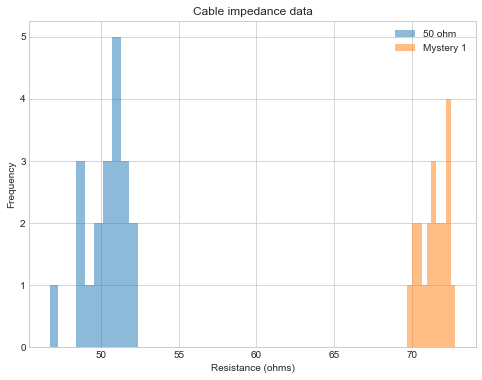

In [6]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))
plt.xlabel('Resistance (ohms)')
plt.ylabel('Frequency')
plt.title('Cable impedance data')

kwargs = dict(alpha=0.5)

plt.hist(fifty_ohm_data, label='50 ohm', **kwargs)
plt.hist(mystery_1_data, label='Mystery 1', **kwargs)
plt.legend();

### Calculate the mean and standard deviation of the data sets

Use the numpy array functions mean() and std(), used here as `np.mean()`, `np.std()` to find the mean and standard deviations of the two data sets, and print these results.  Search for "numpy.mean()" and "numpy.std()" in the Numpy documentation under **Help** or in "Aggregations: Min, Max, and Everything In Between" in the Data Science Handbook.

In [7]:
Z_50 = np.mean(fifty_ohm_data)
Z_50_std = np.std(fifty_ohm_data)
print('50 ohm mean = {:.2f}, std_dev = {:.2f} ohms'.format(Z_50,Z_50_std))

Z_mystery = np.mean(mystery_1_data)
Z_mystery_std = np.std(mystery_1_data)
print('Mystery 1 mean = {:.2f}, std_dev = {:.2f} ohms'.format(Z_mystery,Z_mystery_std))


50 ohm mean = 50.30, std_dev = 1.34 ohms
Mystery 1 mean = 71.40, std_dev = 0.82 ohms


### Convert the data sets to Numpy arrays and explore them

The data sets as stored are simple Python lists.  You can use Numpy functions to calculate with them, but there is much more you can do with a Numpy array.  Here, convert the lists to Numpy arrays with the `np.array()` function.  For example, `my_np_arr = np.array(my_list)`.  Then type `dir(my_np_arr)` (using your array name) in the cell below to see the different methods.  Look for `'mean'` and `'std'`.  Then do the same with the original array, and notice the difference.

What happens if you try to add 20 to your Numpy array (e.g., `20 + my_np_arr`) versus your original list (e.g. `20 + my_list`)?  Try to print both versions.

In [32]:
np_50_data = np.array(fifty_ohm_data)
np_mystery_data = np.array(mystery_1_data)
print('List dir(fifty_ohm_data): \n {}'.format(dir(fifty_ohm_data)))
print('\nList dir(np_50_data): \n {}'.format(dir(np_50_data)))
print('\n20+np_50_data: {}'.format(20+np_50_data))
print('\nNotice how each element now has 20 added to it!\
\nBut watch below: you can\'t do the same operation with a standard Python list.')
print('\n20+fifty_ohm_data: {}'.format(20+fifty_ohm_data))

List dir(fifty_ohm_data): 
 ['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']

List dir(np_50_data): 
 ['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__fl

TypeError: unsupported operand type(s) for +: 'int' and 'list'

See what `print(help(np_50_data))` does (where `np_50_data` is the name of your Numpy array for the 50 ohm data).  Notice the information breaks into two subsets **attributes** and **methods**.  For example, `size` is an attribute that gives the number of elements in the array, but `mean()` is a method that operates on the array and gives the mean value of it.

In [25]:
print(help(np_50_data))

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

Explore the attributes and methods of your Numpy array, for example, `print('size = {}'.format(np_50_data.size))`.  Try a few others to see what they do, and whether they act as you would expect. 

In [29]:
print('size = {}'.format(np_50_data.size))
print('mean = {}'.format(np_50_data.mean()))
print('std dev = {}'.format(np_50_data.std()))
print('Rounded = {}'.format(np_50_data.round()))
print('max = {}, min = {}'.format(np_50_data.max(),np_50_data.min()))
print('peak-to-peak = {}'.format(np_50_data.ptp()))

size = 20
mean = 50.295
std dev = 1.340699444320016
Rounded = [49. 50. 47. 51. 50. 52. 52. 51. 51. 52. 51. 49. 51. 50. 52. 50. 49. 51.
 49. 50.]
max = 52.4, min = 46.7
peak-to-peak = 5.699999999999996


### Write a function to calculate the standard error of an array

Have a look at the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) Chapter on [Defining Functions](https://jakevdp.github.io/WhirlwindTourOfPython/08-defining-functions.html) and write a function that will return the *standard error*, also called the *standard deviation of the mean*, of a Numpy array.  Use the template below.

Look up what "standard error" is, if you do not know.

#### *Solution discussion*

The standard deviation of the mean is the standard deviation of the population divided by the square root of the number of elements in the mean.  This uncertainty assumes that all elements are drawn from the same population, that is, they all have the same uncertainty, or equivalently, come from a population that has the same standard deviation.  The formula is 
$$\sigma_\text{mean,N} = \frac{\sigma}{\sqrt{N}}\;,$$
and it comes from a direct application of the error propagation formula.  

In [40]:
def std_err(data):
    '''Standard deviation (standard error) of the mean.  Requires ndarray'''
    # The above is a help string.
    npdata = np.asarray(data)  # This ensures a Numpy array exists.  The methods, etc. are now in npdata.
    #
    # Your code goes here and should define standard_error
    #
    standard_error = npdata.std()/np.sqrt(npdata.size)
    #
    return standard_error

### Use the function to calculate the uncertainty for the 50 ohm data

The "standard error" is the uncertainty in the mean of a set of data of the same type.  It describes the width of a distribution of mean values calculated from the original data set.  

Use the function above to define a new quantity with uncertainty that gives the measured impedance of the "50 ohm" cable, with uncertainty.  Do the same for the "Mystery 1" cable.  Print out both results using correct significant figures and formatting.

In [42]:
Z_50 = unc.ufloat(np_50_data.mean(),std_err(np_50_data))

print('Impedance of 50 ohm cable = {:.1uP} ohms'.format(Z_50))

Z_mystery = unc.ufloat(np_mystery_data.mean(),std_err(np_mystery_data))

print('Impedance of Mystery 1 cable = {:.1uP} ohms'.format(Z_mystery))

Impedance of 50 ohm cable = 50.3±0.3 ohms
Impedance of Mystery 1 cable = 71.4±0.2 ohms


In [15]:
help(std_err)

Help on function std_err in module __main__:

std_err(data)
    Standard deviation of the mean.  Requires ndarray

